In [1]:
!pip install tensorflow

In [2]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install sklearn
!pip install matplotlib
!pip install pandas

In [4]:
import pandas as pd
import os
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# Load data into dataframe
iris_data = pd.read_csv("iris.csv")
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [6]:
# Use label encoder to convert string to numeric values for target variable
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
iris_data["Species"] = label_encoder.fit_transform(iris_data['Species'])

In [7]:
iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#covert input to numpy array
np_iris = iris_data.to_numpy()
np_iris[0:3]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ]])

In [9]:
#Separate feature and target variables
X_data = np_iris[:,0:4]
Y_data = np_iris[:,4]
print("Feature Before Scaling")
print(X_data[:5,:])
print("Target before scaling")
print(Y_data[:5])

Feature Before Scaling
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target before scaling
[0. 0. 0. 0. 0.]


In [10]:
# Create a scalar modelthat is fit on the input data it normalize the feature data
scalar = StandardScaler().fit(X_data)
scalar

StandardScaler()

In [11]:
# Scale the numeric feature variable
X_data = scalar.transform(X_data)
print("\nFeatures after scaling :\n------------------------------------")
print(X_data[:5,:])


Features after scaling :
------------------------------------
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [12]:
# Convert target variable as a one-hot-encoding array
Y_data = tf.keras.utils.to_categorical(Y_data, 3)

In [13]:
# Split traing and test data 
X_train,X_test,Y_train,Y_test = train_test_split( X_data, Y_data, test_size=0.10)

In [14]:
print("\nTrain Test Dimensions:\n------------------------------------")
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


Train Test Dimensions:
------------------------------------
(135, 4) (135, 3) (15, 4) (15, 3)


In [15]:
from tensorflow import keras

In [16]:
#number of classes in the target variable
NB_CLASSES = 3

In [17]:
# create a sequential model in keras
model = tf.keras.Sequential()

In [18]:
#add the first hidden layer - nodes, input size, logical name, activation function
model.add(keras.layers.Dense(128, 
                             input_shape=(4,),
                             name="Hidden-layer-1", 
                             activation="relu"))

In [19]:
#add the second hidden layer
model.add(keras.layers.Dense(128, 
                             name="Hidden-layer-2", 
                             activation="relu"))

In [20]:
#add output layer with softmax activation - making probability
model.add(keras.layers.Dense(NB_CLASSES, name="Output-layer",
                            activation = 'softmax'))

In [21]:
# compile the model with loss & metrics
model.compile(loss='categorical_crossentropy', 
              metrics=['accuracy'])
# print the model metadata
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
7/7 [==============================] - 1s 50ms/step - loss: 0.8669 - accuracy: 0.6944 - val_loss: 0.6163 - val_accuracy: 0.8519
Epoch 2/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5569 - accuracy: 0.8519 - val_loss: 0.4609 - val_accuracy: 0.8148
Epoch 3/10
7/7 [==============================] - 0s 10ms/step - loss: 0.4466 - accuracy: 0.8519 - val_loss: 0.3949 - val_accuracy: 0.8148
Epoch 4/10
7/7 [==============================] - 0s 10ms/step - loss: 0.3835 - accuracy: 0.8519 - val_loss: 0.3566 - val_accuracy: 0.8148
Epoch 5/10
7/7 [==============================] - 0s 11ms/step - loss: 0.3427 - accuracy: 0.8519 - val_loss: 0.3312 - val_accuracy: 0.8519
Epoch 6/10
7/7 [==============================] - 0s 17ms/step - loss: 0.3115 - accuracy: 0.8519 - val_loss: 0.3110 - val_accuracy: 0.8519
Epoch 7/10
7/7 [==============================] - 0s 10ms/step - loss: 0.2785 - accuracy: 0.8704 - val_loss: 0.3007 - val_accuracy: 0.8519
Epoch 8/10
7/7 [===========

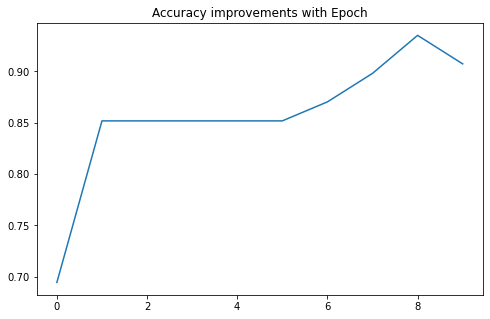

1/1 [==============================] - 0s 35ms/step - loss: 0.2722 - accuracy: 0.9333


[0.27218446135520935, 0.9333333373069763]

In [22]:
# setup hyper parameters for training
BATCH_SIZE = 16 
EPOCHS=10
#Fit the model. This will perform the entire training cycle, including
#forward propagation, loss computation, backward propagation and gradient descent.
#Execute for the specified batch sizes and epoch
#Perform validation after each epoch 
history= model.fit(X_train, Y_train, batch_size=BATCH_SIZE,
                  epochs=EPOCHS, verbose=1, validation_split=0.2)

import matplotlib.pyplot as plt

#Plot accuracy of the model after each epoch
pd.DataFrame(history.history)["accuracy"].plot(figsize=(8, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

#Evaluate the model against the test dataset and print result
model.evaluate(X_test, Y_test)

In [24]:
# saving a model
model.save("iris_save")

#loading a model
loading_model = keras.models.load_model("iris_save")
loading_model.summary()

INFO:tensorflow:Assets written to: iris_save\assets


INFO:tensorflow:Assets written to: iris_save\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17539 (68.51 KB)
Trainable params: 17539 (68.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
#Raw prediction data
prediction_input = [[6.6, 3.,4.4, 1.4]]

#scale prediction data with the same scaling model
scaled_input = scalar.transform(prediction_input)

#Get raw prediction probabilites
raw_prediction = model.predict(scaled_input)
print("Raw Prediction Output (Probabilities) :" , raw_prediction)

1/1 [==============================] - 0s 69ms/step
Raw Prediction Output (Probabilities) : [[0.02971027 0.6415881  0.32870153]]


In [29]:
#Find prediction
prediction = np.argmax(raw_prediction)
print(prediction)
print("Prediction is ", label_encoder.inverse_transform([prediction]))

1
Prediction is  ['versicolor']
